# 가위바위보 분류기를 만들자

- 라이브러리 버전 확인

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


## 데이터 준비

###  데이터 만들기
구글의 [teachable machine](https://teachablemachine.withgoogle.com/) 사이트에서 쉽게 데이터를 만들어볼 수 있다.  
1. Get Started 버튼 클릭
2. Image Project - Standard image model 선택
3. Webcam을 구동해 클래스별 이미지 데이터 직접 촬영


- 웹캠 앞에 포즈를 취하면서 **Hold to Record** 버튼을 누르면 이미지가 캡쳐
   - 여러 각도에서 찍기.
   - 여러 크기로 찍기
   - 혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하기
   - **좋은 데이터가 좋은 결과를 낳는다**

- 100장의 가위/바위/보 이미지를 캡쳐했다면, 우상단의 메뉴 아이콘을 눌러 다운로드
- 이미지들을 "scissor.zip", "rock.zip", "paper.zip이라는 파일 이름으로 본인 컴퓨터에 저장

### 디렉토리 만들기

```bash
$ mkdir -p ~/aiffel/rock_scissor_paper/scissor
$ mkdir -p ~/aiffel/rock_scissor_paper/rock
$ mkdir -p ~/aiffel/rock_scissor_paper/paper
```

- 토막 리눅스 사용법  
`mkdir -p`  
mkdir를 사용하여 하위 디렉토리를 생성할때 차례대로 만들지 않고 중간 디렉토리 없이 바로 그 다음 하위 디렉토리를 만들게되면  
"디렉토리를 생성할 수 없습니다." 라는 메시지가 나오는데,  
`-p` 옵션을 주어 생성하게 되면 자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리를 생성하게 된다.


- 클라우드 이미지 압축 해제

```bash
# 원하는 디렉토리로 이동
$ cd  ~/aiffel/rock_scissor_paper/rock
$ cd  ~/aiffel/rock_scissor_paper/scissor
$ cd  ~/aiffel/rock_scissor_paper/paper

# 압축 해제 명령어 : unzip <파일명>.zip
$ unzip rock.zip
$ unzip scissor.zip
$ unzip paper.zip
```

### 데이터 불러오기 + Resize 하기
숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 한다.  
이를 위해서는 PIL 라이브러리를 사용해본다.  

In [2]:
from PIL import Image 
import glob
import os

In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28, 28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

#### 가위

In [4]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!


#### 바위

In [5]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!


#### 보

In [6]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


#### 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수

`load_data()` 함수  
입력으로 이미지가 있는 폴더 위치를 받는다.   
가위바위보의 경우, 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 된다.

In [7]:
import numpy as np

def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [9]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, 3000)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


라벨:  0


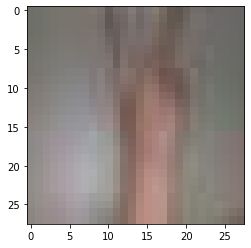

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝

### 딥러닝 네트워크 설계하기

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 하이퍼파라미터
n_channel_1 = 8  # 필터 수
n_channel_2 = 32  # 필터 수
n_dense = 64     # Dense 계층의 노드 수
n_train_epoch=15  # 학습

model = Sequential([
    Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(n_channel_2, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(n_dense, activation='relu'),
    Dense(3, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        2336      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

### 딥러닝 네트워크 학습시키기

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
# 모델 훈련
model.fit(
    x_train, y_train, 
    epochs=n_train_epoch)

Epoch 1/15
94/94 [==============================] - 2s 17ms/step - loss: 3.8368 - accuracy: 0.5250
Epoch 2/15
94/94 [==============================] - 2s 17ms/step - loss: 0.6057 - accuracy: 0.7620
Epoch 3/15
94/94 [==============================] - 2s 17ms/step - loss: 0.4895 - accuracy: 0.7963
Epoch 4/15
94/94 [==============================] - 2s 17ms/step - loss: 0.4075 - accuracy: 0.8363
Epoch 5/15
94/94 [==============================] - 2s 17ms/step - loss: 0.4060 - accuracy: 0.8357
Epoch 6/15
94/94 [==============================] - 2s 17ms/step - loss: 0.2565 - accuracy: 0.9010
Epoch 7/15
94/94 [==============================] - 2s 17ms/step - loss: 0.2498 - accuracy: 0.9000
Epoch 8/15
94/94 [==============================] - 2s 17ms/step - loss: 0.1883 - accuracy: 0.9297
Epoch 9/15
94/94 [==============================] - 2s 17ms/step - loss: 0.1197 - accuracy: 0.9620
Epoch 10/15
94/94 [==============================] - 2s 17ms/step - loss: 0.1136 - accuracy: 0.9623
Epoch 11/

### 얼마나 잘 만들었는지 확인하기(테스트)

```bash
# test 디렉토리를 생성해서, 친구에게 받은 데이터를 업로드
$ mkdir -p ~/aiffel/rock_scissor_paper/test
$ mkdir -p ~/aiffel/rock_scissor_paper/test/scissor
$ mkdir -p ~/aiffel/rock_scissor_paper/test/rock
$ mkdir -p ~/aiffel/rock_scissor_paper/test/paper

# 압축 해체
$ cd  ~/aiffel/rock_scissor_paper/test/rock && unzip rock.zip
$ cd  ~/aiffel/rock_scissor_paper/test/scissor && unzip scissor.zip
$ cd  ~/aiffel/rock_scissor_paper/test/paper && unzip paper.zip
```

```python
import zipfile
import os

def extract_zip_with_unique_names(zip_folder_path, extract_folder_path):
    # zip 폴더 내의 모든 zip 파일을 대상으로 반복
    for zip_file in os.listdir(zip_folder_path):
        if zip_file.endswith('.zip'):
            # zip 파일의 전체 경로를 구성
            zip_file_path = os.path.join(zip_folder_path, zip_file)
            # 파일 이름에서 확장자를 제외
            zip_file_name = os.path.splitext(zip_file)[0]
            
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                # zip 파일 내의 모든 파일을 대상으로 반복
                for member in zip_ref.infolist():
                    # 원본 파일 이름을 가져오기
                    original_filename = member.filename
                    # 새 파일 이름 구성(여기서는 zip 파일 이름을 앞에 추가)
                    new_filename = f"{zip_file_name}_{original_filename}"
                    # 추출 경로 지정
                    new_file_path = os.path.join(extract_folder_path, new_filename)
                    
                    # 파일 추출
                    with zip_ref.open(member, 'r') as file, open(new_file_path, 'wb') as outfile:
                        outfile.write(file.read())

# 사용 예시
zip_folder_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"      # Zip 파일이 있는 폴더 경로
extract_folder_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"  # 추출된 파일을 저장할 폴더 경로

# 함수 호출
extract_zip_with_unique_names(zip_folder_path, extract_folder_path)
```

#### 테스트

In [26]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

510  images to be resized.
510  images resized.
381  images to be resized.
381  images resized.
403  images to be resized.
403  images resized.


In [29]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_data(image_dir_path, 1294)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 1294 입니다.
x_test shape: (1294, 28, 28, 3)
y_test shape: (1294,)


In [30]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

41/41 - 0s - loss: 9.9951 - accuracy: 0.4096
test_loss: 9.995097160339355 
test_accuracy: 0.4095826745033264


In [31]:
from sklearn.metrics import classification_report
import numpy as np

# 예측 수행
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # 가장 높은 확률을 가진 클래스를 선택


print("\nClassification Report")
print(classification_report(y_test, y_pred_classes))


Classification Report
              precision    recall  f1-score   support

           0       0.47      0.64      0.54       510
           1       0.28      0.20      0.23       381
           2       0.40      0.31      0.35       403

    accuracy                           0.41      1294
   macro avg       0.38      0.39      0.37      1294
weighted avg       0.39      0.41      0.39      1294



#### 어떤 데이터를 잘못 추론했을까?

In [32]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [4.3273424e-03 9.9567091e-01 1.7746364e-06]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


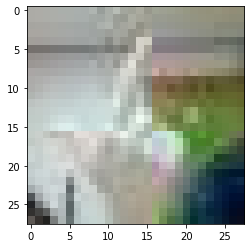

In [33]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [8.2300447e-02 9.1769892e-01 6.3878707e-07]
라벨: 0, 예측결과: 1


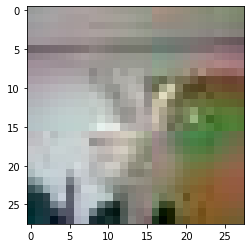

예측확률분포: [1.000000e+00 6.573300e-20 4.304206e-19]
라벨: 2, 예측결과: 0


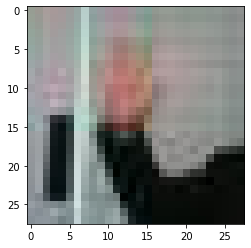

예측확률분포: [1.8161916e-05 3.7986107e-02 9.6199578e-01]
라벨: 1, 예측결과: 2


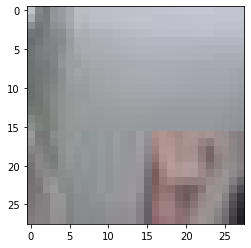

예측확률분포: [3.0281364e-09 1.2598426e-07 9.9999988e-01]
라벨: 1, 예측결과: 2


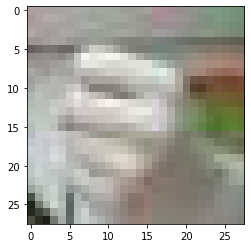

예측확률분포: [9.9546558e-01 3.8271010e-05 4.4961325e-03]
라벨: 1, 예측결과: 0


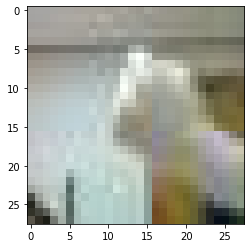

In [34]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 더 좋은 네트워크 만들어보기

#### 데이터 증강 (Data Augmentation)
이미지 데이터의 다양성을 늘려 모델이 더 일반화되도록 한다.  
ImageDataGenerator를 사용하여 이미지를 회전시키거나, 가로/세로로 이동, 뒤집기, 확대/축소 등의 변환을 적용할 수 있다.

In [35]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

# 훈련 데이터와 검증 데이터로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rotation_range=45,           # 무작위 회전의 각도 범위
    width_shift_range=0.2,       # 수평 이동 비율
    height_shift_range=0.2,      # 수직 이동 비율
    shear_range=0.2,             # 전단 변환의 각도
    zoom_range=0.2,              # 확대/축소 비율
    horizontal_flip=True,        # 수평 뒤집기
    fill_mode='reflect',  
)

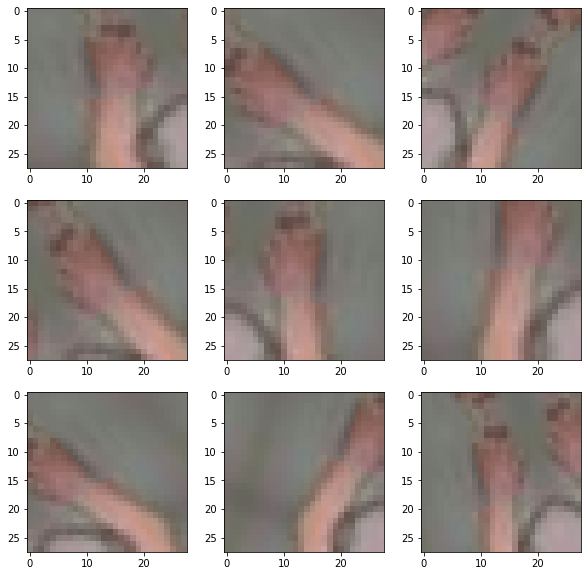

In [36]:
it = train_datagen.flow(x_train[:1], batch_size=1)

# 첫 9개의 증강된 이미지를 시각화합니다.
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()                 # 증강된 이미지 배치를 생성
    image = batch[0].astype('uint8')  # 이미지를 정수형으로 변환하여 시각화
    plt.imshow(image)
plt.show()

In [37]:
# 검증 데이터에 대해서는 데이터 증강을 적용하지 않는다.
# 필요에 따라 검증 데이터에 대해 적절한 전처리만 적용한다.
val_datagen = ImageDataGenerator()

# 데이터 증강을 적용한 데이터 생성기 생성
train_generator = train_datagen.flow(x_train, y_train)
val_generator = val_datagen.flow(x_val, y_val)

#### 정규화 기법 추가
배치 정규화(Batch Normalization)를 추가하여 각 층의 입력을 정규화하고, 학습을 안정화시키며 성능을 향상시킬 수 있다.

In [75]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# 하이퍼파라미터
n_channel_1 = 128
n_channel_2 = 256
n_channel_3 = 128
n_dense = 32             # Dense 계층의 노드 수
n_train_epoch= 100       # 학습
dropout_rate = 0.2       # Dropout 비율

model = Sequential([
    Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(dropout_rate),
    
    Conv2D(n_channel_2, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(dropout_rate),
    
    Conv2D(n_channel_3, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(dropout_rate),
    
    Flatten(),
    Dense(n_dense, activation='relu'),
    Dropout(dropout_rate),
    Dense(3, activation='softmax')
])

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 128)       3584      
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 256)       295168    
_________________________________________________________________
batch_normalization_10 (Batc (None, 11, 11, 256)       1024      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 256)        

#### Early Stopping
학습 중 검증 데이터에 대한 성능이 더 이상 개선되지 않을 때 학습을 자동으로 중단시키는 방법  
이를 통해 과적합을 방지하고, 학습 시간을 절약할 수 있다.

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping 설정
early_stopping = EarlyStopping(
    monitor='val_loss',  # 검증 손실을 기준으로
    patience=10,         # 성능이 개선되지 않는 에폭을 몇 번 허용할 것인지
    verbose=1,
    mode='min',          # 'min'은 손실이 감소하는 것을 멈출 때, 'max'는 정확도가 더 이상 증가하지 않을 때 중단
    restore_best_weights=True  # 가장 좋은 모델의 가중치를 복원
)

In [68]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [69]:
# 모델 훈련
history = model.fit(
    train_generator,
    epochs=n_train_epoch,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/100
60/60 [==============================] - 22s 357ms/step - loss: 0.9466 - accuracy: 0.6052 - val_loss: 5.4904 - val_accuracy: 0.3917
Epoch 2/100
60/60 [==============================] - 21s 356ms/step - loss: 0.6380 - accuracy: 0.7292 - val_loss: 7.1115 - val_accuracy: 0.3229
Epoch 3/100
60/60 [==============================] - 21s 350ms/step - loss: 0.6217 - accuracy: 0.7474 - val_loss: 3.0789 - val_accuracy: 0.4208
Epoch 4/100
60/60 [==============================] - 21s 351ms/step - loss: 0.6023 - accuracy: 0.7536 - val_loss: 3.3367 - val_accuracy: 0.6000
Epoch 5/100
60/60 [==============================] - 21s 350ms/step - loss: 0.5355 - accuracy: 0.7786 - val_loss: 7.6643 - val_accuracy: 0.3271
Epoch 6/100
60/60 [==============================] - 21s 353ms/step - loss: 0.4896 - accuracy: 0.8000 - val_loss: 8.0600 - val_accuracy: 0.4229
Epoch 7/100
60/60 [==============================] - 21s 350ms/step - loss: 0.4833 - accuracy: 0.8052 - val_loss: 11.5099 - val_accuracy

#### 테스트

In [70]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

41/41 - 3s - loss: 12.3337 - accuracy: 0.3501
test_loss: 12.333674430847168 
test_accuracy: 0.3500772714614868


In [71]:
from sklearn.metrics import classification_report
import numpy as np

# 예측 수행
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # 가장 높은 확률을 가진 클래스를 선택


print("Classification Report")
print(classification_report(y_test, y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.39      0.54      0.46       510
           1       0.04      0.02      0.03       381
           2       0.40      0.42      0.41       403

    accuracy                           0.35      1294
   macro avg       0.28      0.33      0.30      1294
weighted avg       0.29      0.35      0.32      1294



#### 시각화

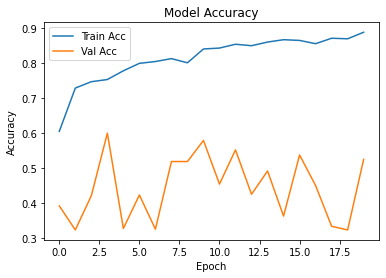

In [72]:
# 훈련 및 검증 정확도 그리기
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

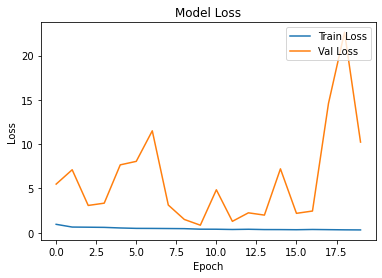

In [74]:
# 훈련 및 검증 손실 그리기
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

#### 정규화 기법만

In [115]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# 하이퍼파라미터
n_channel_1 = 32
n_channel_2 = 64
n_channel_3 = 128
n_dense = 16             # Dense 계층의 노드 수
n_train_epoch= 100       # 학습
dropout_rate = 0.2       # Dropout 비율

model = Sequential([
    Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(dropout_rate),
    
    Conv2D(n_channel_2, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(dropout_rate),
    
    Conv2D(n_channel_3, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(dropout_rate),
    
    Flatten(),
    Dense(n_dense, activation='relu'),
    Dropout(dropout_rate),
    Dense(3, activation='softmax')
])

In [116]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
batch_normalization_39 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_40 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 5, 5, 64)        

#### 최적화 알고리즘 변경

In [117]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),  # 학습률 조정
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

/opt/conda/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [124]:
from tensorflow.keras.optimizers import RMSprop

# RMSprop 최적화 알고리즘 사용
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [132]:
from tensorflow.keras.optimizers import SGD

# SGD 최적화 알고리즘 사용, 학습률(lr)과 모멘텀(momentum) 설정
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [133]:
# Early Stopping 설정
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    mode='min',                # 'min'은 손실이 감소하는 것을 멈출 때, 'max'는 정확도가 더 이상 증가하지 않을 때 중단
    restore_best_weights=True  # 가장 좋은 모델의 가중치를 복원
)

In [134]:
# 모델 훈련
model.fit(
    x_train, y_train, 
    epochs=n_train_epoch,
    validation_split=0.2,
    callbacks=[early_stopping])

Epoch 1/100
48/48 [==============================] - 3s 61ms/step - loss: 0.4571 - accuracy: 0.8340 - val_loss: 4.6440 - val_accuracy: 0.3438
Epoch 2/100
48/48 [==============================] - 3s 57ms/step - loss: 0.3778 - accuracy: 0.8496 - val_loss: 2.2900 - val_accuracy: 0.4427
Epoch 3/100
48/48 [==============================] - 3s 58ms/step - loss: 0.2497 - accuracy: 0.9023 - val_loss: 4.7034 - val_accuracy: 0.3177
Epoch 4/100
48/48 [==============================] - 3s 58ms/step - loss: 0.2573 - accuracy: 0.8978 - val_loss: 8.6762 - val_accuracy: 0.3958
Epoch 5/100
48/48 [==============================] - 3s 57ms/step - loss: 0.2509 - accuracy: 0.9043 - val_loss: 0.2514 - val_accuracy: 0.8958
Epoch 6/100
48/48 [==============================] - 3s 57ms/step - loss: 0.1857 - accuracy: 0.9212 - val_loss: 9.7853 - val_accuracy: 0.4661
Epoch 7/100
48/48 [==============================] - 3s 58ms/step - loss: 0.1731 - accuracy: 0.9310 - val_loss: 1.7471 - val_accuracy: 0.5365
Epoch 

- 테스트

In [135]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

41/41 - 1s - loss: 9.9476 - accuracy: 0.4606
test_loss: 9.947566032409668 
test_accuracy: 0.4605873227119446


In [136]:
from sklearn.metrics import classification_report
import numpy as np

# 예측 수행
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # 가장 높은 확률을 가진 클래스를 선택


print("Classification Report")
print(classification_report(y_test, y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.77      0.62       510
           1       0.00      0.00      0.00       381
           2       0.38      0.50      0.43       403

    accuracy                           0.46      1294
   macro avg       0.30      0.42      0.35      1294
weighted avg       0.32      0.46      0.38      1294



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 시각화

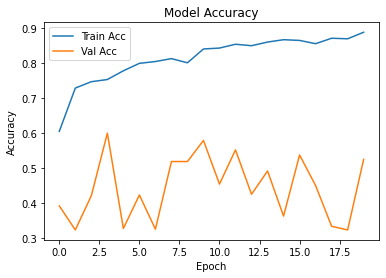

In [137]:
# 훈련 및 검증 정확도 그리기
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

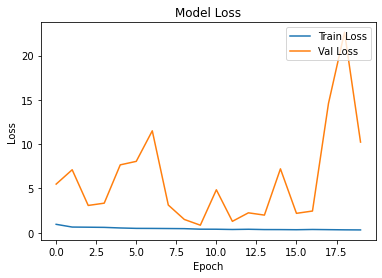

In [138]:
# 훈련 및 검증 손실 그리기
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

## 회고
딥러닝을 배우니까 너무 재밌는 거 같다.  
뭔가 숫자 맞추기 게임하는 거 같기도 하고 정확도가 오르면 너무 기쁜데  
떨어지면 왜 떨어지는지 알 수 없으니까 답답하기도 하고  

다시 한 번 인공지능의 재미를 느낀 거 같다.   

아직 정확도가 좋지 않아서 여러번 시도할 예정이지만,,,,  
어떻게 하면 더 잘나올까..고민이 된다..  

시간이 얼마 없으니까 할 수 있는데까지 해봐야겠다. ;(  

++ 추가
새로 train 데이터를 1,000장 찍어서 만들었다.  
여전히 별로인 거 같은데.. 뭐가 문제인지 열심히 수정하는 중이다.  

+++ 